In [2]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import backend as K, Sequential
from keras.callbacks import EarlyStopping
from keras.optimizers import Adagrad, SGD
from sklearn.preprocessing import MinMaxScaler

import multiprocessing
import time

from lppls.lppls import lppls_layer


['/Users/pairing/projects/mlnd/Capstone', '/Users/pairing/miniconda3/lib/python37.zip', '/Users/pairing/miniconda3/lib/python3.7', '/Users/pairing/miniconda3/lib/python3.7/lib-dynload', '', '/Users/pairing/miniconda3/lib/python3.7/site-packages', '/Users/pairing/miniconda3/lib/python3.7/site-packages/IPython/extensions', '/Users/pairing/.ipython']


## Fitting the model

In [3]:
# read the yahoo data: 
df = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/SPY?period1=1235862000&period2=1577401200&interval=1d&events=history', 
                 index_col='Date', 
                 parse_dates=True)

df.fillna(method='ffill', inplace=True)

# LPPLS works better with log prices
x = np.log(df['Close'].values)

# fits should be more stable if we always use the same domain
x = MinMaxScaler().fit_transform(x.reshape(-1, 1))

# reshape data into keras batch format 
x = x.reshape(1, -1)

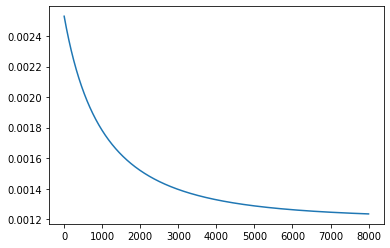

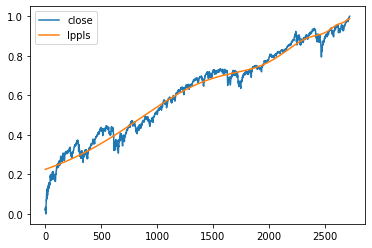

In [4]:
model = Sequential([lppls_layer.LPPLSLayer()])
model.compile(loss='mse', optimizer=Adagrad(0.011))
hist = model.fit(x, x, epochs=8000, verbose=0)

plt.plot(hist.history["loss"])
plt.show()

res = pd.DataFrame({"close": x[0], 
        "lppls": model.predict_on_batch(x)
       })
res.plot()